In [1]:
import numpy as np
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('rocket')

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.
Sampling: [obs, p]


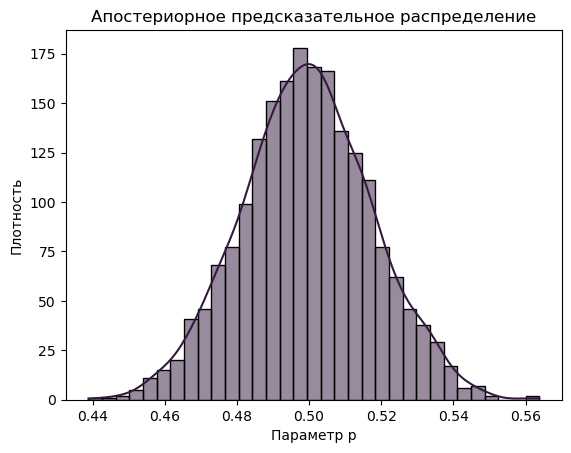

In [2]:
data = np.array([0,0,1,1,1,0,1,0,1,0])

with pm.Model() as coin_flip_model:
    # вероятность выпадения орла 0.5 (1-орёл, 0-решка) 
    p = pm.Beta('p', alpha=100, beta=100)

    obs = pm.Bernoulli('obs',p=p,observed=data)

    trace = pm.sample(2000,tune=1000)

with coin_flip_model:
    post_pred = pm.sample_posterior_predictive(trace=trace, var_names=['p','obs'])

sns.histplot(post_pred.posterior_predictive.p.mean(axis=0), kde=True)
plt.title('Апостериорное предсказательное распределение')
plt.xlabel('Параметр p')
plt.ylabel('Плотность')
plt.show()

<div>Так как мы обучаем 4 цепочки Маркова, то наш итоговый результат будет иметь размер (4,2000), поэтому мы усредним значения для каждого испытания из 2000, чтобы сделать наш массив одномерным.<div>